In [138]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
from childes_mi.utils.paths import DATA_DIR, FIGURE_DIR, ensure_dir
from childes_mi.utils.general import flatten,save_fig

In [140]:
from childes_mi.information_theory import model_fitting as mf

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

In [142]:
param_df_french = pd.read_pickle(DATA_DIR / 'param_dfs' / 'phonbank_french.pickle')

In [143]:
param_df_english = pd.read_pickle(DATA_DIR / 'param_dfs' / 'phonbank.pickle')

In [144]:
param_df_french

,dataset,age_low,age_high,a_value,a_stderr,b_value,b_stderr,c_value,c_stderr,d_value,d_stderr,f_value,f_stderr
0,phonbank,3,20,1.031225,None,0.961794,None,0.297650,None,-1.397936,None,0.001360,None
1,phonbank,2.5,3,0.706422,0.147616,0.821490,0.070292,0.348414,0.05902,-1.310050,0.058065,0.003264,0.000054
2,phonbank,2,2.5,0.325830,0.094821,0.616843,0.060002,0.503827,0.04898,-1.434785,0.037238,0.006385,0.00006
3,phonbank,1.5,2,0.330310,0.058564,0.558299,0.035223,0.460063,0.031672,-1.242988,0.027811,0.014043,0.000124
4,phonbank,1,1.5,0.351947,0.073527,0.597750,0.040794,0.311452,0.037637,-1.086173,0.050838,0.017666,0.000315
5,phonbank,0.5,1,0.364677,0.093064,0.516317,0.050656,0.301707,0.051679,-1.153525,0.074775,0.022128,0.000411


In [70]:
params = ['a', 'b', 'c', 'd', 'f']

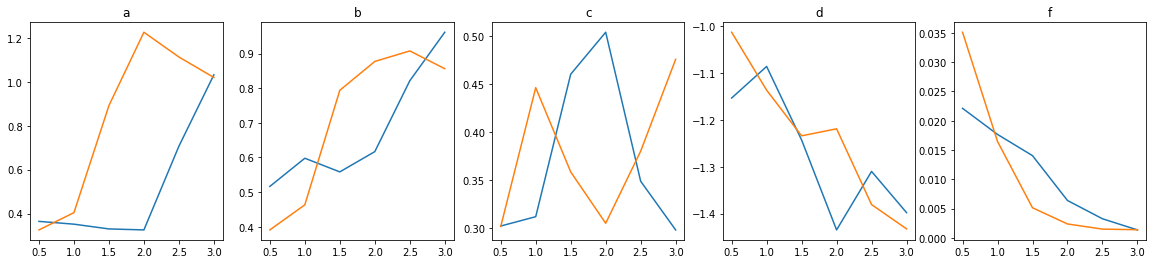

In [71]:
fig, axs = plt.subplots(ncols=len(params), figsize=(20,4))
for pi, param in enumerate(params):
    ax = axs.flatten()[pi]
    ax.plot(param_df_french.age_low.values, param_df_french[param+'_value'].values)
    ax.plot(param_df_english.age_low.values, param_df_english[param+'_value'].values)
    ax.set_title(param)

In [97]:
MI_DF_long_english = pd.read_pickle(DATA_DIR / "mi" / "phonbank_longest_seqs-fitted.pickle")
MI_DF_long_french = pd.read_pickle(DATA_DIR / "mi" / "phonbank_longest_seqs-french-fitted.pickle")
MI_DF_long_english['language'] = 'english'
MI_DF_long_french['language'] = 'french'

In [98]:
MI_DF_long_french[:3]

,MI,MI_var,shuff_MI,shuff_MI_var,distances,age_cohort_low,age_cohort_high,n_phones,n_unique_phones,age,...,R2_exp,R2_concat,R2_power,AICc_exp,AICc_concat,AICc_power,bestfitmodel,curvature,min_peak,language
0,"[4.220272462086125, 3.827182912393157, 3.65988...","[0.03966478656415546, 0.03863028781460936, 0.0...","[3.5478525638018503, 3.549876481214623, 3.5626...","[0.038492261314211185, 0.03839394643764451, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.5,1,2607,1,1.00,...,0.871427,0.875000,0.870347,-141.737470,-138.662714,-141.252561,exp,"[-7.914698642882322e-06, -1.1889780416005512e-...",NaN,french
1,"[4.003031163827437, 3.9261375225418274, 3.6549...","[0.06548629734066684, 0.06372777471464103, 0.0...","[3.416818373426647, 3.413034965699241, 3.42533...","[0.06352383582895753, 0.06343581412051416, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.5,1,1858,1,1.00,...,0.943401,0.944601,0.929061,-433.239749,-430.942916,-411.108872,exp,"[-3.201372858616443e-06, -4.809091532503684e-0...",NaN,french
2,"[4.123307160457033, 3.802053605125085, 3.66670...","[0.05585662525034512, 0.054689141875846704, 0....","[3.541364106943293, 3.5215856948513924, 3.5299...","[0.05445856150651234, 0.0542388669284434, 0.05...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.5,1,2405,1,0.75,...,0.876445,0.879455,0.873236,-324.920292,-322.940713,-322.407573,exp,"[-6.1496564820145606e-06, -9.237835640576883e-...",NaN,french


In [103]:
parameter_translation = {
    "e_init": "a",
    "e_decay_const": "b",
    "p_init": "c",
    "p_decay_const": "d",
    "intercept": "f",
}

In [104]:
param_df_long = pd.DataFrame(
    columns=[
        "dataset", 
        "language",
        "age",
        "age_low", 
        "age_high", 
        "a_value", 
        "a_stderr",
        "b_value", 
        "b_stderr",
        "c_value", 
        "c_stderr",
        "d_value", 
        "d_stderr",
        "f_value", 
        "f_stderr",
        "n_phones"
    ]
)
for idx, row in pd.concat([MI_DF_long_english, MI_DF_long_french]).iterrows():
    param_vals = {}
    param_stderrs = {}
    for param in row.concat_results.params:
        param_vals[param] = row.concat_results.params[param].value
        param_stderrs[param] = row.concat_results.params[param].stderr
    param_df_long.loc[len(param_df_long)] = [
        'phonbank',
        row.language,
        row.age,
        row.age_cohort_low,
        row.age_cohort_high,
        param_vals["e_init"],
        param_stderrs["e_init"],
        param_vals["e_decay_const"],
        param_stderrs["e_decay_const"],
        param_vals["p_init"],
        param_stderrs["p_init"],
        param_vals["p_decay_const"],
        param_stderrs["p_decay_const"],
        param_vals["intercept"],
        param_stderrs["intercept"],
        row.n_phones[0],

    ]

In [105]:
row.n_phones

n_phones    11235
n_phones     4654
Name: 27, dtype: object

In [106]:
param_df_long

,dataset,language,age,age_low,age_high,a_value,a_stderr,b_value,b_stderr,c_value,c_stderr,d_value,d_stderr,f_value,f_stderr,n_phones
0,phonbank,english,1.000,0.5,1,0.916681,NaN,0.487511,NaN,3.833011e-01,NaN,-5.662647e-01,NaN,2.528720e-09,NaN,2643
1,phonbank,english,1.000,0.5,1,0.175117,0.115428,0.186762,0.088756,6.320594e-01,0.156292,-1.295517e+00,0.248690,9.292534e-03,0.003465,2280
2,phonbank,english,1.000,0.5,1,0.902099,NaN,1.347280,NaN,1.590681e-02,NaN,-2.026213e-10,NaN,8.897935e-05,NaN,627
3,phonbank,english,0.833,0.5,1,0.616850,NaN,0.235705,NaN,3.303689e-01,NaN,-3.953974e-01,NaN,4.913694e-09,NaN,1099
4,phonbank,english,1.000,0.5,1,0.322544,NaN,0.632599,NaN,1.934914e-02,NaN,-1.171605e-10,NaN,1.598076e-04,NaN,618
5,phonbank,english,1.417,1.0,1.5,0.273951,0.100055,0.229476,0.043432,6.259756e-01,0.128247,-1.807383e+00,0.426585,8.219205e-03,0.001141,7838
6,phonbank,english,1.500,1.0,1.5,0.115413,0.067803,0.113759,0.029107,9.164725e-01,0.133392,-1.517202e+00,0.299740,5.584207e-03,0.002033,6411
7,phonbank,english,1.417,1.0,1.5,0.181788,0.088209,0.175820,0.057348,7.072594e-01,0.139175,-1.379916e+00,0.194653,5.141196e-03,0.001968,6330
8,phonbank,english,1.333,1.0,1.5,0.611419,0.360930,0.299866,0.080234,6.456871e-01,0.299431,-1.022521e+00,0.187810,1.916110e-03,0.003678,6244
9,phonbank,english,1.333,1.0,1.5,0.345272,0.224652,0.302770,0.096876,7.550269e-01,0.196014,-1.157160e+00,0.112311,2.948123e-03,0.001844,6112


In [107]:
import seaborn as sns

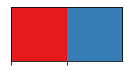

In [108]:
pal = sns.color_palette('Set1', 2)
color_dict = {
    "english": pal[0],
    "french": pal[1]
}
sns.palplot(pal)

In [109]:
params

['a', 'b', 'c', 'd', 'f']

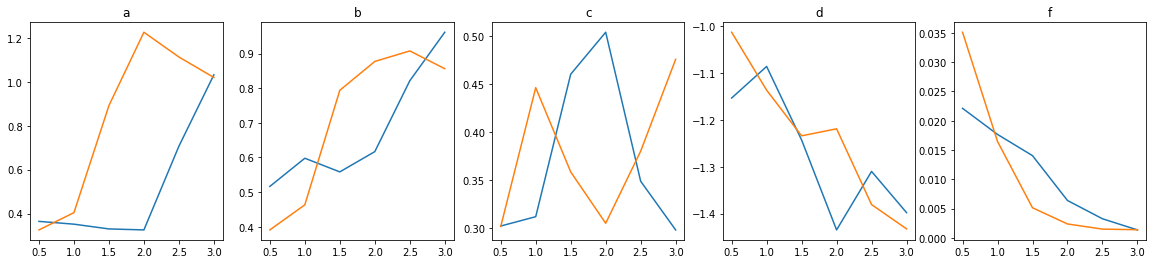

In [111]:
fig, axs = plt.subplots(ncols=len(params), figsize=(20,4))
for pi, param in enumerate(params):
    ax = axs.flatten()[pi]
    ax.plot(param_df_french.age_low.values, param_df_french[param+'_value'].values)
    ax.plot(param_df_english.age_low.values, param_df_english[param+'_value'].values)
    ax.set_title(param)

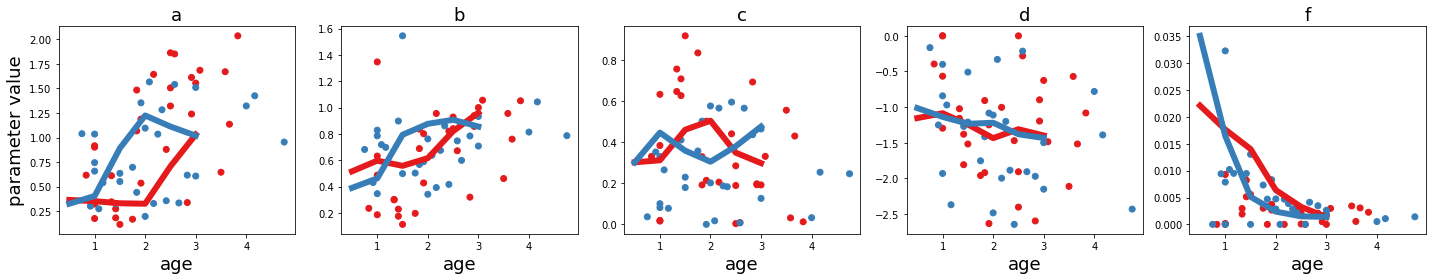

In [147]:
fig, axs = plt.subplots(ncols=len(params), figsize=(20,4))
for pi, param in enumerate(params):
    ax = axs.flatten()[pi]
    colors = [color_dict[i] for i in param_df_long.language]
    ax.scatter(param_df_long.age.values, param_df_long[param+'_value'].values, c = colors)
    #age_mean = (param_df_french.age_low.values + param_df_french.age_high.values)/2
    age_mean = (param_df_french.age_low.values)
    ax.plot(age_mean, param_df_french[param+'_value'].values, c= color_dict['english'], lw = 6)
    ax.plot(age_mean, param_df_english[param+'_value'].values, c= color_dict['french'], lw=6)
    ax.set_xlabel("age", fontsize=18)
    if pi ==0:
        ax.set_ylabel("parameter value", fontsize=18)
    ax.set_title(param, fontsize=18)
    
plt.tight_layout()

In [130]:
param_df_long.n_phones = param_df_long.n_phones.astype('int')

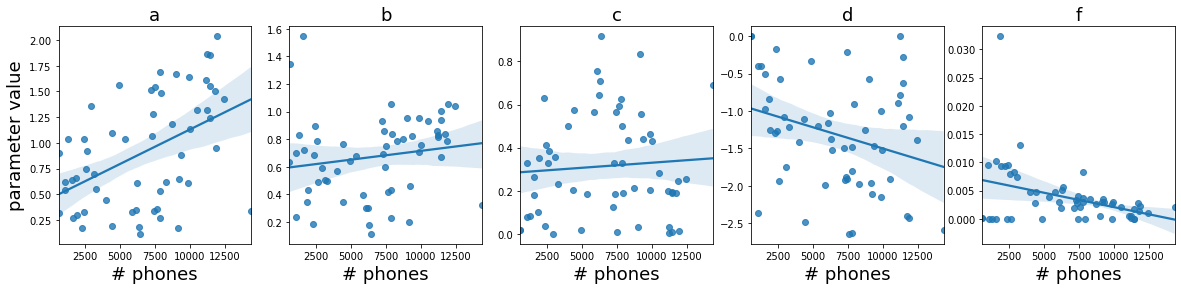

In [150]:
fig, axs = plt.subplots(ncols=len(params), figsize=(20,4))
for pi, param in enumerate(params):
    ax = axs.flatten()[pi]
    colors = [color_dict[i] for i in param_df_long.language]
    #ax.scatter(param_df_long.n_phones.values, param_df_long[param+'_value'].values, c = colors)
    param_name = param+'_value'
    sns.regplot(x="n_phones", y=param_name, data=param_df_long, ax = ax)
    if pi !=0:
        ax.set_ylabel("", fontsize=18)
    else:
        ax.set_ylabel("parameter value", fontsize=18)
    ax.set_xlabel("# phones", fontsize=18)
    ax.set_title(param, fontsize=18)

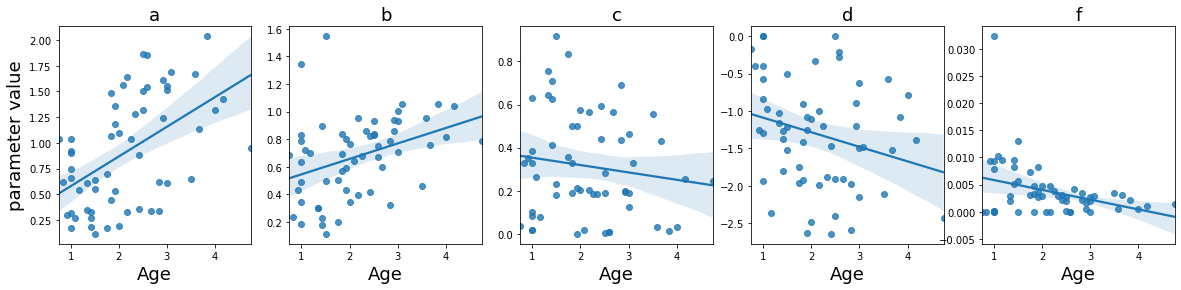

In [151]:
fig, axs = plt.subplots(ncols=len(params), figsize=(20,4))
for pi, param in enumerate(params):
    ax = axs.flatten()[pi]
    colors = [color_dict[i] for i in param_df_long.language]
    #ax.scatter(param_df_long.n_phones.values, param_df_long[param+'_value'].values, c = colors)
    param_name = param+'_value'
    sns.regplot(x="age", y=param_name, data=param_df_long, ax = ax)
    ax.set_title(param)
    if pi !=0:
        ax.set_ylabel("", fontsize=18)
    else:
        ax.set_ylabel("parameter value", fontsize=18)
    ax.set_xlabel("Age", fontsize=18)
    ax.set_title(param, fontsize=18)

<AxesSubplot:xlabel='age', ylabel='n_phones'>

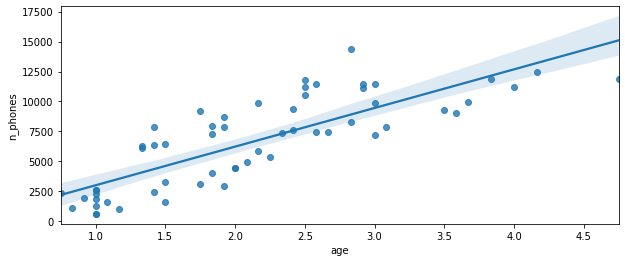

In [152]:
fig, ax = plt.subplots(ncols=1, figsize=(10,4))
sns.regplot(x="age", y="n_phones", data=param_df_long, ax = ax)